In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sps
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegressionCV,RandomizedLogisticRegression
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder as OHE
%matplotlib inline

In [82]:
df_acc = pd.read_csv("H20141041AccData.csv").dropna(axis=1).sort(columns="pk_teuna_fikt")

# df_inv = pd.read_csv("H20131161InvData.csv").dropna(axis=1).sort(columns="pk_teuna_fikt")
# df_veh = pd.read_csv("H20131161VehData.csv").dropna(axis=1).sort(columns="pk_teuna_fikt")

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [83]:
df_acc.SHAA -=1
df_acc.SHAA //= 12
set(df_acc.SHAA)

{0, 1, 2, 3, 4, 5, 6, 7}

In [84]:
# df_acc=df_acc[df_acc.SEMEL_YISHUV>0]
df_acc.HUMRAT_TEUNA.replace(2,1, inplace=True)
# df_acc.HUMRAT_TEUNA.replace(1,0, inplace=True)
# df_acc.HUMRAT_TEUNA.replace(3,1, inplace=True)
set(df_acc.HUMRAT_TEUNA)

{1, 3}

In [85]:
cols_to_drop = ["sug_tik","SHNAT_TEUNA","pk_teuna_fikt", "SUG_TEUNA"]
df_acc.drop(cols_to_drop,inplace=True,axis=1)
df = df_acc
df.head()

,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,YEHIDA,HODESH_TEUNA,YOM_BE_HODESH,SHAA,SUG_YOM,YOM_LAYLA,YOM_BASHAVUA,...,MERHAK_EZEM,LO_HAZA,OFEN_HAZIYA,MEKOM_HAZIYA,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,ZURAT_ISHUV,STATUS_IGUN
0,1,1,7400,51,1,3,0,4,5,6,...,9,9,3,3,1,4,41,411,14,1
1,1,2,2650,20,1,2,0,4,5,5,...,9,9,3,3,9,5,51,511,16,3
2,1,4,0,20,1,8,0,4,5,4,...,9,9,1,2,2,9,99,999,99,1
3,1,1,5000,20,1,10,0,4,5,6,...,9,9,1,3,1,5,51,511,13,1
4,1,2,7600,12,1,18,0,4,5,7,...,9,9,3,3,1,2,24,246,16,1


In [86]:
# df_inv.head()

In [87]:
# print(df_veh.SHNAT_YITZUR.median())
# df_veh.SHNAT_YITZUR.replace(0,df_veh.SHNAT_YITZUR.median(),inplace=True)
# df_veh.head()

In [88]:
# # df = pd.concat([df_acc,df_veh, df_inv], axis=1)

# df = df_acc.join([df_veh, df_inv],on='pk_teuna_fikt')
# df.head()
# df.drop('SUG_TIK' ,axis=1,inplace=True)
# df.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030546390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000031B52CF8>]], dtype=object)

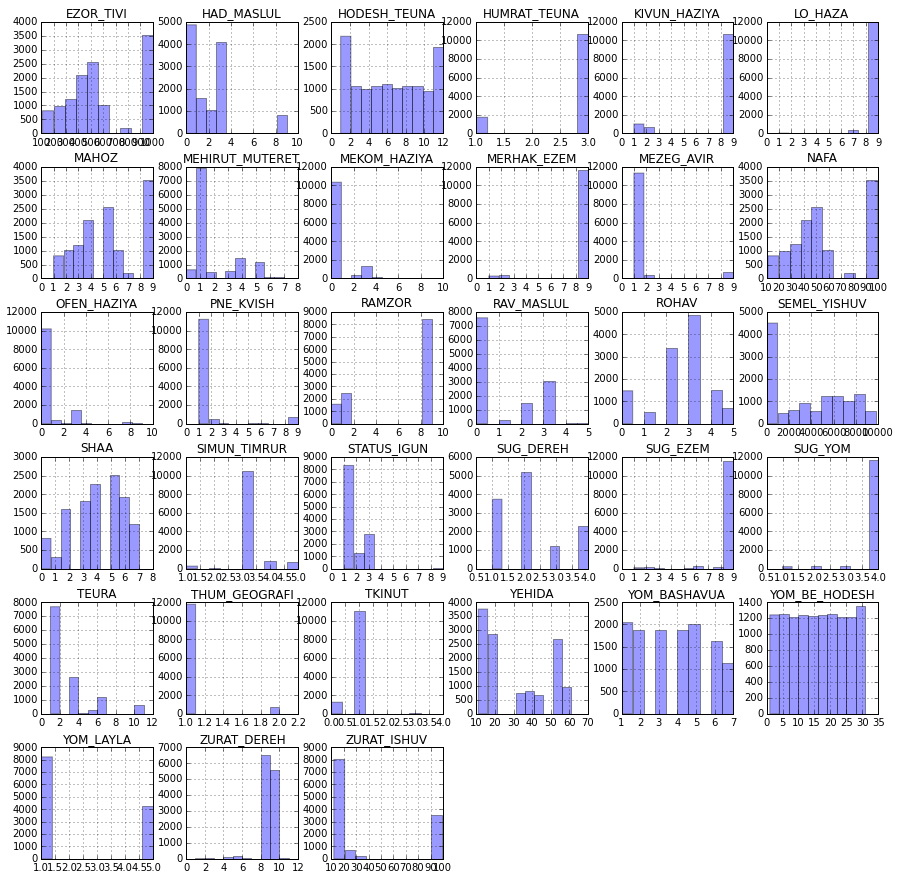

In [89]:
# https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html
df.hist(alpha=0.4,figsize=(15,15))
# plt.show()

In [90]:
# http://stackoverflow.com/questions/15021521/how-to-encode-a-categorical-variable-in-sklearn
# http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/

In [91]:
ohe = OHE()
y= df.HUMRAT_TEUNA.values
# x=df.drop("HUMRAT_TEUNA",axis=1)
x = pd.get_dummies(df.drop("HUMRAT_TEUNA",axis=1),sparse=True)
# x=ohe.fit_transform(x)
x.shape

(12445, 32)

In [92]:
x = pd.get_dummies(x,columns=list(x.columns.values))
x.head()

,THUM_GEOGRAFI_1,THUM_GEOGRAFI_2,SUG_DEREH_1,SUG_DEREH_2,SUG_DEREH_3,SUG_DEREH_4,SEMEL_YISHUV_0,SEMEL_YISHUV_26,SEMEL_YISHUV_28,SEMEL_YISHUV_29,...,ZURAT_ISHUV_46,ZURAT_ISHUV_49,ZURAT_ISHUV_51,ZURAT_ISHUV_52,ZURAT_ISHUV_99,STATUS_IGUN_1,STATUS_IGUN_2,STATUS_IGUN_3,STATUS_IGUN_4,STATUS_IGUN_9
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
clf = LogisticRegressionCV(class_weight="auto")
# print(cross_val_score(clf,x,y,scoring="f1").mean())

In [94]:
# selector = RFECV(clf, step=0.1, cv=3)
selector = RandomizedLogisticRegression(n_resampling =200,selection_threshold=0.38)
selector = selector.fit(x, y)

In [95]:
x[selector.get_support(indices=True)].head()

,SUG_DEREH_1,SUG_DEREH_4,YEHIDA_14,RAMZOR_9,TKINUT_3,ROHAV_0,SIMUN_TIMRUR_4,TEURA_5,PNE_KVISH_6,SUG_EZEM_9,...,OFEN_HAZIYA_8,OFEN_HAZIYA_9,MEKOM_HAZIYA_1,MEKOM_HAZIYA_2,MAHOZ_1,MAHOZ_2,MAHOZ_4,NAFA_11,ZURAT_ISHUV_27,ZURAT_ISHUV_35
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [96]:
best_feats = list(x[selector.get_support(indices=True)].columns.values)
print(best_feats)

['SUG_DEREH_1', 'SUG_DEREH_4', 'YEHIDA_14', 'RAMZOR_9', 'TKINUT_3', 'ROHAV_0', 'SIMUN_TIMRUR_4', 'TEURA_5', 'PNE_KVISH_6', 'SUG_EZEM_9', 'LO_HAZA_9', 'OFEN_HAZIYA_0', 'OFEN_HAZIYA_1', 'OFEN_HAZIYA_8', 'OFEN_HAZIYA_9', 'MEKOM_HAZIYA_1', 'MEKOM_HAZIYA_2', 'MAHOZ_1', 'MAHOZ_2', 'MAHOZ_4', 'NAFA_11', 'ZURAT_ISHUV_27', 'ZURAT_ISHUV_35']


In [97]:
y_pred = cross_val_predict(clf,x,y,cv=5)
print(classification_report(y, y_pred, target_names=["Lethal","Minor"]))

             precision    recall  f1-score   support

     Lethal       0.25      0.60      0.35      1733
      Minor       0.92      0.70      0.79     10712

avg / total       0.82      0.69      0.73     12445



In [98]:
y_pred_red = cross_val_predict(clf,selector.transform(x),y,cv=5)
print(classification_report(y, y_pred_red, target_names=["Lethal","Minor"]))

             precision    recall  f1-score   support

     Lethal       0.24      0.66      0.35      1733
      Minor       0.92      0.66      0.77     10712

avg / total       0.83      0.66      0.71     12445

